Gradient Boosting Regressor RMSE: 29756.235356182347
Random Forest Regressor RMSE: 38274.980609618426


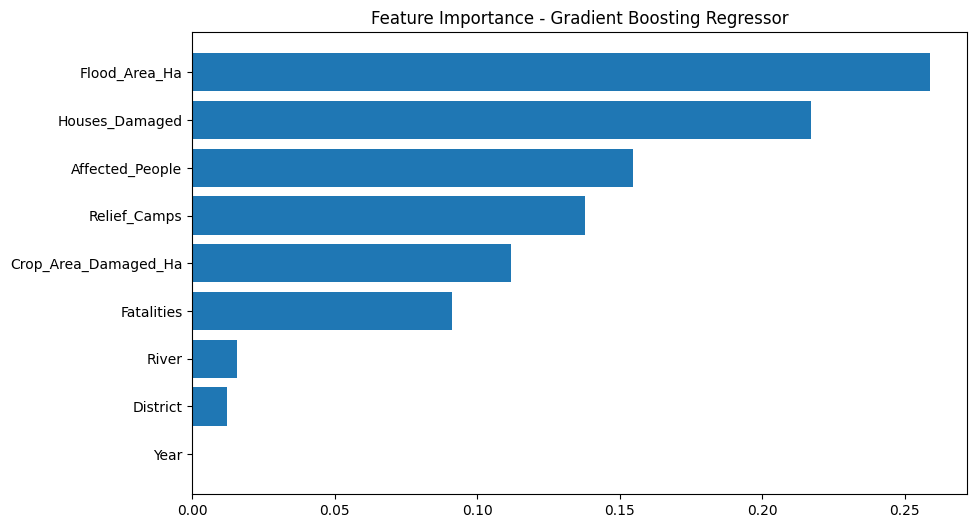

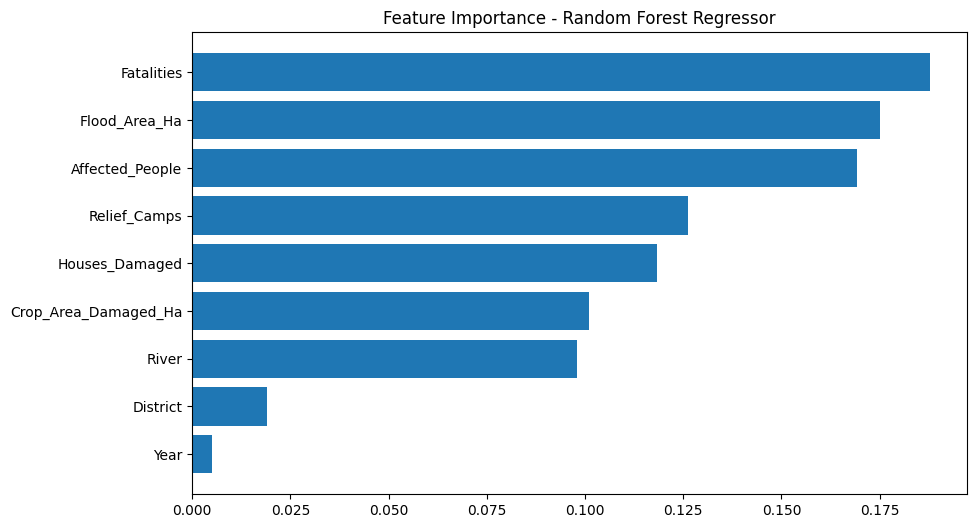

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------
# Step 0: Load dataset
# -------------------------------
file_path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
data = pd.read_excel(file_path)

# -------------------------------
# Step 1: Create target
# -------------------------------
data['restoration_priority'] = data['Affected_People'] + data['Houses_Damaged']

# -------------------------------
# Step 2: Encode categorical columns
# -------------------------------
categorical_cols = ['District', 'River']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# -------------------------------
# Step 3: Split features and target
# -------------------------------
X = data.drop(['restoration_priority'], axis=1)
y = data['restoration_priority']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Step 4: Scale features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 5: Regression Models
# -------------------------------
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
print("Gradient Boosting Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rfr.fit(X_train_scaled, y_train)
y_pred_rfr = rfr.predict(X_test_scaled)
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

# -------------------------------
# Step 6: Feature Importance
# -------------------------------
def plot_feature_importance(model, X, model_name):
    importance = model.feature_importances_
    features = X.columns
    sorted_idx = np.argsort(importance)
    
    plt.figure(figsize=(10,6))
    plt.barh(features[sorted_idx], importance[sorted_idx])
    plt.title(f'Feature Importance - {model_name}')
    plt.show()

plot_feature_importance(gbr, X, "Gradient Boosting Regressor")
plot_feature_importance(rfr, X, "Random Forest Regressor")

In [2]:
print(data.columns)

Index(['Year', 'District', 'River', 'Affected_People', 'Flood_Area_Ha',
       'Houses_Damaged', 'Crop_Area_Damaged_Ha', 'Fatalities', 'Relief_Camps'],
      dtype='object')
